In [1]:
import numpy as np
np.random.seed(2022)

# Data Set
The MNIST data set is a data set of handwritten digits. For additional details of the data set, visit [sklearn's website](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

Each data point is an 8x8 image of a handwritten number.

This example is borrowed in part from [this blog](https://blog.paperspace.com/random-forests/).

In [2]:
# Import MNIST data set
from sklearn import datasets

# Take a look at the data
mnist = datasets.load_digits()
X = mnist.data
Y = mnist.target

print('Predictors X:')
print(X, end = '\n\n')

print('Response Y:')
print(Y, end = '\n\n')

print('Size of the predictors set:', X.shape)
print('Number of observations:', Y.shape)

Predictors X:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

Response Y:
[0 1 2 ... 8 9 8]

Size of the predictors set: (1797, 64)
Number of observations: (1797,)


Each column in the data set corresponds to one cell in the 8x8 image of the number.

In [3]:
print('This is the 8x8 image for the first observation:\n', X[0], end = '\n\n')
print('This is the digit for the first observation:', Y[0])

This is the 8x8 image for the first observation: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

This is the digit for the first observation: 0


For fun, we can plot the numbers to see what the handwritten digit looks like.

<Figure size 432x288 with 0 Axes>

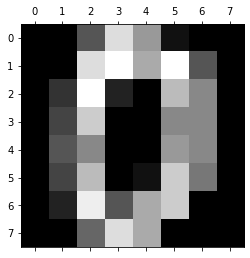

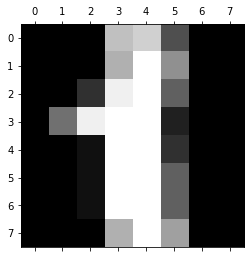

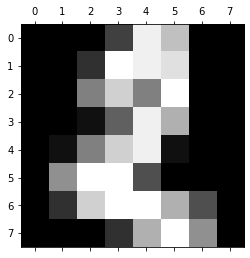

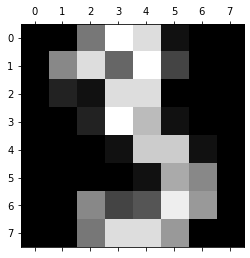

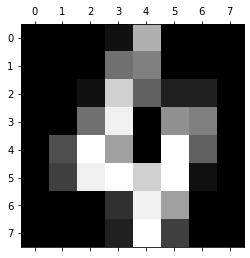

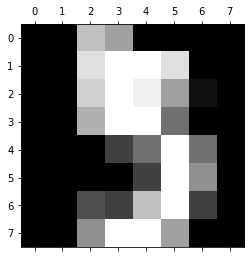

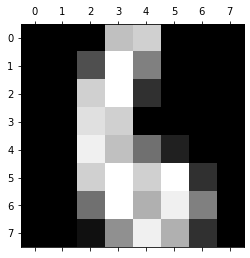

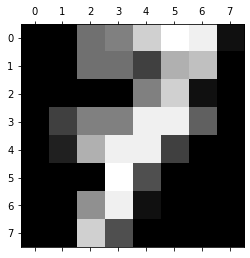

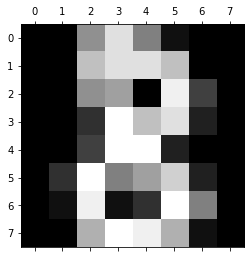

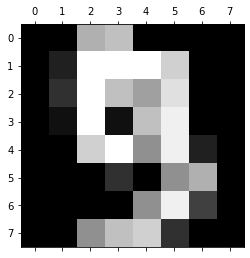

In [4]:
# Import function to plot images
import matplotlib.pyplot as plt
plt.gray() # Sets colors of the plot to grayscale

for i in range(10): # Print all ten numbers, 0 to 9
  plt.matshow(mnist.images[i]) # Show the i-th image
  plt.show() # Show plot

Let's process the data to make it suitable for the models we're fitting. We converted the above Numpy arrays to Pandas dataframes.

In [5]:
import pandas as pd
import numpy as np

# Create Pandas dataframes from the MNIST data set
y = pd.Series(mnist.target).astype('int').astype('category')
X = pd.DataFrame(mnist.data)

# Show first five observations of the predictors X
print(X.head())

# Show first five observations of the response Y
print(y.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
0    0
1    1
2    2
3    3
4    4
dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]


We'll import train_test_split to create the training and testing data sets. For the entire data set, 70% will be used for training and 30% will be used for testing.

In [6]:
# Import function split data into training and testing data sets
from sklearn.model_selection import train_test_split

# Split the data into two parts: training data set (70% of original data) 
# and testing data set (30% of original data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Trees
We'll fit a decision tree to the MNIST data set.

In [7]:
# First, import the DecisionTreeClassifier function
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = None)

# Train the Decision Tree with the training data
dt_clf.fit(X_train, y_train)

# Create predictions from the fitted Decision Tree with the testing data
y_pred_dt = dt_clf.predict(X_test)
print('Predicted output from the decision tree model:\n', y_pred_dt)

Predicted output from the decision tree model:
 [6 9 8 0 8 2 4 3 8 5 4 5 8 4 8 1 6 1 3 2 6 8 0 6 7 9 6 0 4 0 9 4 2 2 4 4 3
 3 2 9 1 2 7 4 9 0 0 2 9 8 1 0 5 6 2 9 8 6 0 4 2 2 4 4 2 4 5 1 3 0 4 4 3 3
 6 6 2 5 2 0 9 8 0 4 1 8 0 0 2 9 1 4 9 6 7 7 6 2 1 7 9 9 3 7 5 5 0 0 6 2 6
 7 9 0 7 3 0 6 0 1 0 9 6 9 4 9 6 7 2 1 9 3 5 5 9 1 4 7 5 0 6 8 5 1 5 9 5 6
 5 2 7 4 7 2 1 0 3 3 3 5 2 1 5 7 8 2 2 8 3 1 6 0 3 3 1 5 9 3 4 4 2 0 1 9 7
 1 5 7 2 3 2 8 5 2 5 1 0 1 1 9 4 9 5 4 5 6 6 7 5 6 8 7 1 6 4 5 2 0 6 3 6 0
 0 9 7 4 6 8 2 4 3 9 5 8 1 1 6 6 2 2 4 7 3 5 9 2 3 1 5 9 8 9 0 4 1 4 0 7 6
 3 5 9 0 2 0 3 9 3 5 3 2 9 4 3 5 1 9 2 0 1 2 2 8 9 4 7 5 6 0 3 6 8 9 7 2 5
 8 0 2 7 5 8 9 1 3 0 1 3 8 4 4 3 5 8 3 4 8 1 7 0 6 1 1 9 3 1 1 8 2 1 8 3 4
 6 7 3 4 1 9 5 1 8 0 8 9 0 6 5 5 7 5 8 5 4 6 4 4 1 5 2 0 0 3 3 5 0 1 4 5 3
 2 2 8 6 0 3 5 7 9 8 6 4 7 6 5 8 9 9 6 0 4 7 1 5 0 7 0 7 1 6 7 1 5 8 8 1 4
 1 2 6 1 6 2 7 1 2 7 7 5 4 8 8 7 2 4 4 9 8 2 9 8 2 9 0 7 8 8 1 5 3 4 2 3 6
 8 7 1 4 5 7 9 1 1 9 8 5 8 4 0 7 2 2 1 9 0 5 5 6 6 5

## Plot Tree
Let's visualize the decision tree.

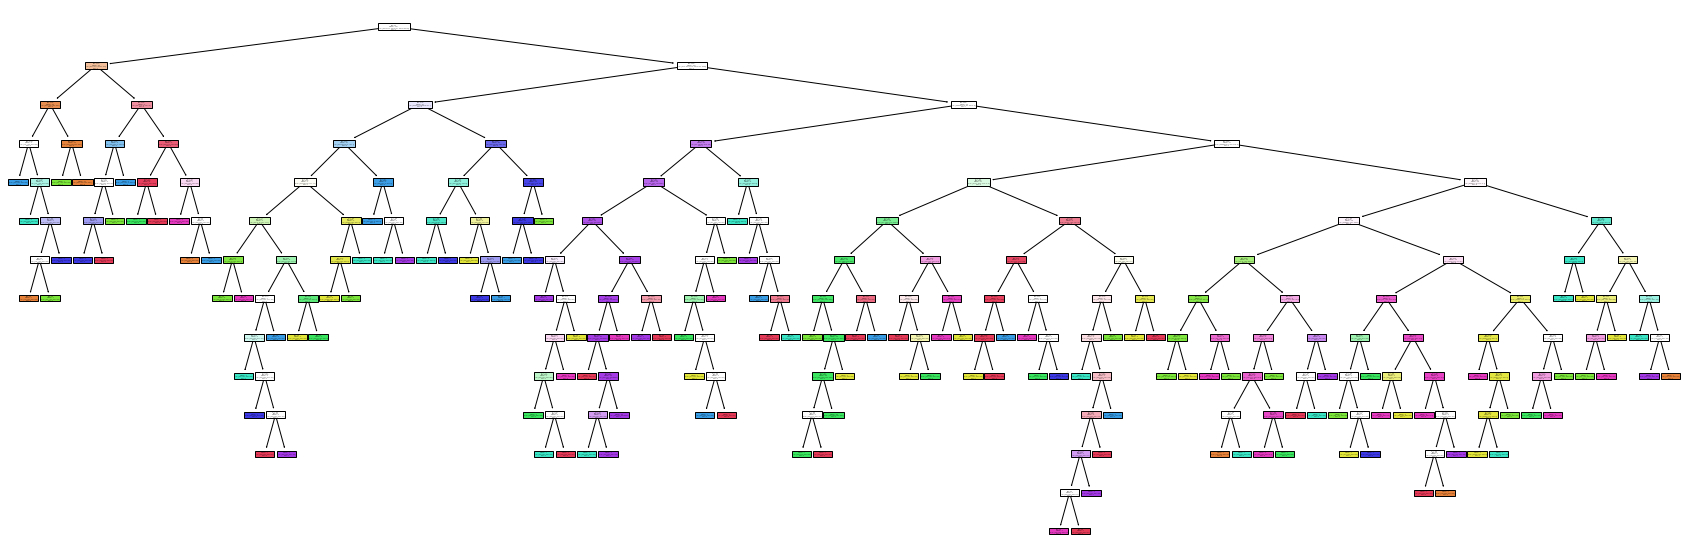

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30, 10))
plot_tree(dt_clf, feature_names = X.columns, class_names = [str(i) for i in y.cat.categories], filled = True)
plt.show() # Show plot

## Decision Tree Performance
Let's determine how accurate we are... accuracy of 84.4%, which is okay.

In [9]:
from sklearn.metrics import accuracy_score

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Percent Accuracy: ", np.round(acc_dt*100, 2))

Percent Accuracy:  84.44


## Maximum Depth
What happens if we reduce the maximum depth (`max_depth`) of the tree?

In [10]:
# First, import the DecisionTreeClassifier function
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree
dt_clf2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)

# Train the Decision Tree with the training data
dt_clf2.fit(X_train, y_train)

# Create predictions from the fitted Decision Tree with the testing data
y_pred_dt2 = dt_clf2.predict(X_test)
print('Predicted output from the decision tree model:\n', y_pred_dt2, end = '\n\n')

# Accuracy of the shallower decision tree
acc_dt2 = accuracy_score(y_test, y_pred_dt2)
print("Accuracy: ", np.round(acc_dt2*100, 2))

Predicted output from the decision tree model:
 [6 9 3 0 3 8 6 3 9 5 4 5 8 4 8 8 6 4 3 8 6 8 0 6 7 9 9 4 4 0 9 4 2 3 4 4 2
 7 8 9 8 8 7 8 9 0 0 2 3 7 8 0 5 6 8 9 8 6 0 4 8 2 4 4 2 4 5 9 3 0 4 4 3 3
 6 6 2 5 8 0 9 3 0 4 8 8 0 0 8 7 8 4 3 6 7 5 6 2 8 7 9 9 3 7 5 5 4 0 6 5 6
 5 3 4 7 2 0 6 0 2 4 3 6 9 4 9 1 7 8 8 9 2 5 5 9 8 4 7 5 0 6 3 5 4 5 3 5 6
 5 8 7 4 7 8 8 0 3 3 2 5 2 8 5 7 8 8 2 3 2 7 6 0 3 3 2 5 9 3 4 9 2 0 2 9 9
 8 5 7 8 3 2 8 5 8 5 4 4 4 8 9 4 9 5 4 5 6 6 7 5 6 8 7 8 6 4 5 2 0 6 3 6 0
 0 5 7 9 1 8 8 1 3 9 5 8 8 2 6 6 8 8 4 7 3 5 3 8 3 8 5 5 3 9 0 4 1 4 0 7 6
 3 5 3 0 8 0 3 3 3 5 3 2 3 4 3 5 8 9 1 0 2 2 8 8 9 4 7 5 1 0 3 6 3 9 7 8 5
 3 0 8 7 5 8 9 8 3 0 1 2 8 4 4 3 5 8 3 4 8 8 7 0 6 1 9 9 3 8 2 8 8 8 8 2 4
 6 7 3 4 8 9 5 8 8 0 8 5 4 6 5 5 7 5 8 5 4 6 4 4 9 5 8 0 0 3 3 5 0 1 9 5 3
 2 8 4 6 0 2 5 7 9 8 6 5 9 6 5 8 9 9 6 0 4 7 4 5 0 2 0 7 8 6 7 7 5 8 7 9 4
 1 3 6 2 6 9 7 9 2 7 7 5 4 8 8 7 8 4 4 9 8 8 3 8 8 9 0 7 7 8 1 5 3 4 8 3 6
 8 7 8 4 5 7 9 1 1 9 3 5 8 9 0 7 8 2 8 9 0 5 5 6 9 5

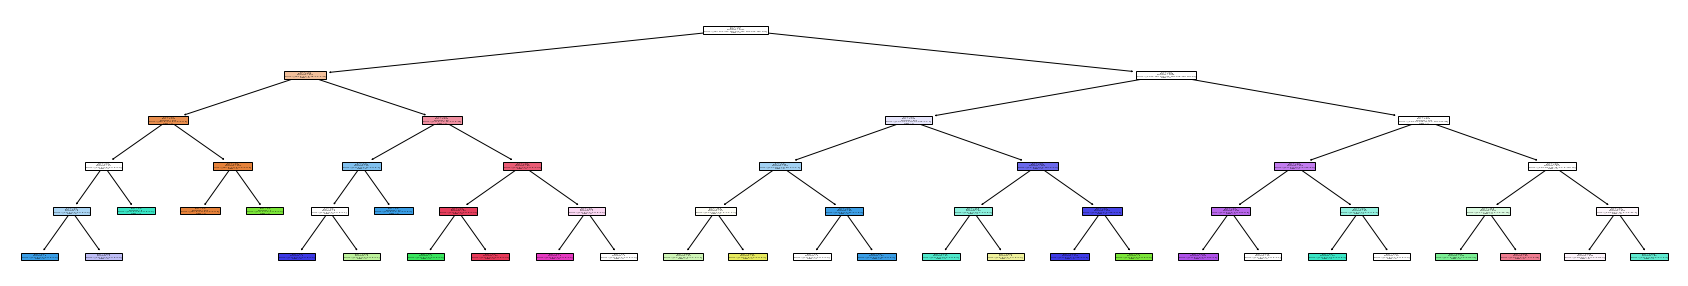

In [11]:
plt.figure(figsize = (30, 5))
plot_tree(dt_clf2, feature_names = X.columns, class_names = [str(i) for i in y.cat.categories], filled = True)
plt.show() # Show plot

# Random Forest
We'll fit a random forest model to the MNIST data set.

In [12]:
# First, import the RandomForestClassifier function
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest
rf_clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = None, max_features = 'sqrt')

# Train the Random Forest with the training data
rf_clf.fit(X_train, y_train)

# Create predictions from the fitted Random Forest with the testing data
y_pred_rf = rf_clf.predict(X_test)
print('Predicted output from the random forest model\n', y_pred_rf)

Predicted output from the random forest model
 [6 9 8 0 8 2 6 3 3 5 4 5 8 4 8 1 6 1 3 2 6 8 0 6 7 9 8 6 4 0 9 4 2 1 4 4 6
 4 2 9 1 2 9 8 9 0 0 1 9 8 1 0 5 6 2 9 8 6 0 4 7 2 4 4 2 4 5 1 3 0 4 4 3 3
 6 6 2 5 2 0 9 4 0 7 1 8 0 0 2 7 1 4 1 6 7 7 6 2 1 7 9 9 3 7 5 5 0 0 6 0 6
 7 9 4 7 1 0 6 0 7 0 3 6 9 6 9 1 7 2 1 9 9 5 5 9 8 4 7 5 0 6 8 5 0 5 9 5 6
 5 2 7 4 7 2 1 0 3 3 3 5 2 1 5 7 8 2 2 1 3 7 6 0 3 3 9 5 9 1 4 4 2 0 7 3 7
 1 5 7 8 3 2 8 5 8 5 1 4 1 1 9 4 9 5 4 5 6 6 7 5 6 8 7 1 6 4 5 2 0 6 3 6 0
 0 7 7 4 1 8 4 5 3 9 5 3 1 1 6 6 2 2 1 7 3 5 3 2 3 1 5 9 8 9 0 4 1 4 0 7 6
 3 5 9 0 2 0 3 5 3 5 3 2 3 9 3 5 1 9 1 0 1 1 2 8 9 4 4 5 6 0 3 6 8 9 7 2 5
 8 0 2 7 5 8 9 1 3 0 6 3 3 4 4 3 5 8 3 4 8 1 7 0 6 1 1 9 3 1 1 2 2 1 8 2 4
 6 4 3 4 1 9 5 1 8 0 8 7 0 6 5 5 7 5 8 5 4 6 4 4 1 3 2 0 0 3 3 5 0 6 4 5 3
 2 2 4 6 0 3 5 7 9 8 6 7 9 6 5 8 9 9 6 0 4 7 1 5 0 7 0 7 3 6 7 7 5 8 8 1 9
 1 3 6 1 6 2 7 1 5 7 7 5 4 8 8 7 2 4 4 9 8 2 4 1 2 9 0 7 3 8 1 5 3 4 2 8 6
 2 7 1 4 5 7 9 1 1 9 8 8 8 4 0 7 8 2 1 9 0 5 5 6 3 4 

## Plot One of the Trees
Let's look at one of the trees in the forest.

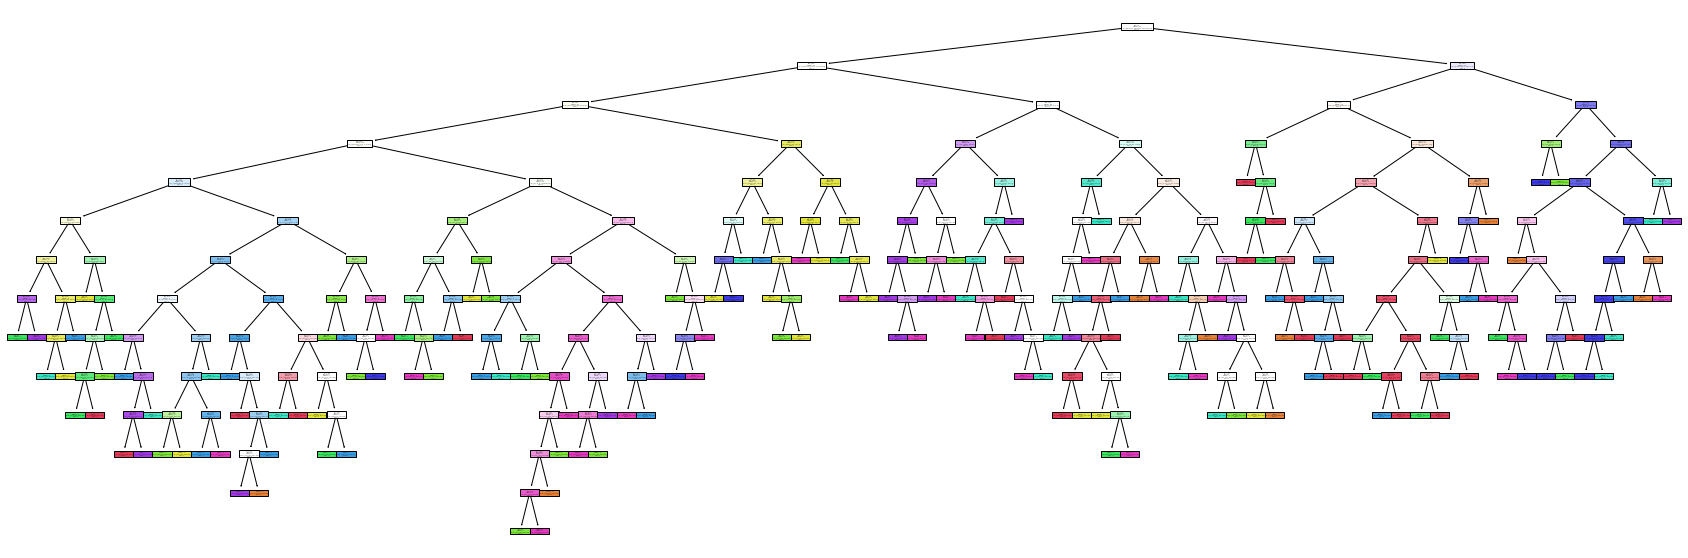

In [13]:
# Import function to plot decision trees
from sklearn.tree import plot_tree

# Specify figure size
plt.figure(figsize = (30, 10))

# Plot one of the decision trees in the forest
plot_tree(rf_clf.estimators_[1], feature_names = X.columns, class_names = [str(i) for i in y.cat.categories], filled = True)
plt.show() # Show plot

## Random Forest Performance

Let's determine how accurate we are... accuracy of 97.2%, which is pretty good!

In [14]:
# Import function to determine model accuracy
from sklearn.metrics import accuracy_score

# Accuracy is determiend based on the observed values versus the fitted values
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Percent Accuracy: ", np.round(acc_rf*100, 2))

Accuracy:  97.22


## Variable Importance
Let's also take advantage of the variable importance built into the random forest model.

We can create a barplot to visualize the variable importances for all 64 cells.

Top 10 most important variables:
 21    0.054328
43    0.047006
36    0.039724
42    0.039026
26    0.037641
33    0.034472
28    0.032849
30    0.030385
60    0.028517
61    0.027888
dtype: float64


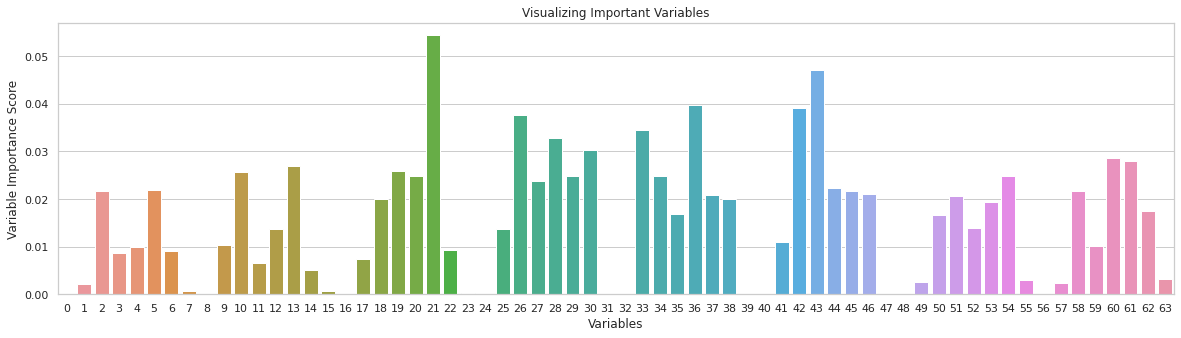

In [15]:
# Pull variable importances from the Random Forest
var_imp = pd.Series(rf_clf.feature_importances_).sort_values(ascending = False)
print('Top 10 most important variables:\n', var_imp[:10])

# Import seaborn to create plot
import seaborn as sns

# Create plot
%matplotlib inline
sns.set(rc = {"figure.figsize": (20, 5)})
sns.set_theme(style = "whitegrid")
sns.barplot(x = var_imp.index, y = var_imp) # Barplot of the variable importance
plt.xlabel('Variables') # Set label for x-axis
plt.ylabel('Variable Importance Score') # Set label for y-axis
plt.title('Visualizing Important Variables') # Set title for plot
plt.show() # Show plot

In [16]:
var_imp[:10].index

Int64Index([21, 43, 36, 42, 26, 33, 28, 30, 60, 61], dtype='int64')

## Tree depth
Currently, maximum depth is set to "None," which means trees in the forest are built as deep as possible. 

From visualizing the tree, we can't see much of what's going on. Perhaps we should consider shallower trees.

What happens if you adjust the maximum depth (`max_depth`) of the random forest?

# Gradient Boosting Machines

We'll fit a gradient boosting machine model to the MNIST data set.

In [17]:
# First, import the GradientBoostingClassifier function
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting Machine
gbm_clf = GradientBoostingClassifier(n_estimators = 100, criterion = 'squared_error', max_depth = 3, max_features = None)

# Train the Gradient Boosting Machine with the training data
gbm_clf.fit(X_train, y_train)

# Create predictions from the fitted Gradient Boosting Machine with the testing data
y_pred_gbm = gbm_clf.predict(X_test)

## Gradient Boosting Machine Performance

Let's determine how accurate we are... accuracy of 94.6%, which is pretty good! But not as good as Random Forest in this case!

In [18]:
acc_gbm = accuracy_score(y_test, y_pred_gbm)
print("Percent Accuracy: ", np.round(acc_gbm*100, 2))

Accuracy:  94.63


# Overall Performance Comparisons
Which model performed the best?

In [19]:
print('Decision Tree:', np.round(acc_dt*100, 2))
print('Random Forest:', np.round(acc_rf*100, 2))
print('Gradient Boosting Machine:', np.round(acc_gbm*100, 2))

Decision Tree: 84.44
Random Forest: 97.22
Gradient Boosting Machine: 94.63


# Additional Questions

*   What if you ran each model 100 times on different training and testing data sets?
    * Which model would be the least stable?
*   What would happen if you changed the training and testing split from 70%/30% to 80%/20%? 
    * What about 60%/40%?



